In [224]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Using the rent prices from appartments in Lausanne from PW 02, restricting to the feature living area.

### Load Data

In [225]:
import pandas as pd
df = pd.read_csv("./lausanne-appart.csv")
N  = df.shape[0]
print(df.head())
df.shape

   living_area  nb_rooms  rent_price
0           69       3.0        1810
1           95       3.5        2945
2           21       1.5         685
3           20       1.0         720
4           33       1.5         830


(201, 3)

### Normalization

In [226]:
x0 = df.values[:,0]
x = (x0-np.mean(x0))/np.std(x0)
y0 = df.values[:,2]
y = (y0-np.mean(y0))/np.std(y0)

Text(0, 0.5, 'rent_price')

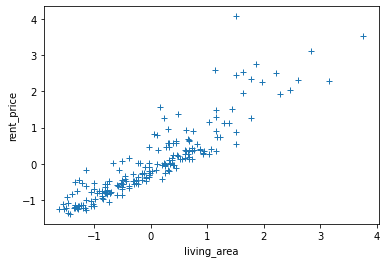

In [227]:
plt.plot(x, y,"+")
plt.xlabel("living_area")
plt.ylabel("rent_price")

### Linear Model, Normal Equations and Solution

We denote the observed rent by $y_j$ (at time $x_j$) and the model rent by $\hat{y}_j$ we assume 

$\qquad \hat{y}_j = \alpha + \beta x_j$

By minimizing the mean squares error

$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

we can fit the straigth line as follows by using the design matrix $X$ and the data vector $Y$, defined by 

$\qquad X = \left(\begin{array}{cc} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{array}\right), \qquad Y = \left(\begin{array}{c} y_0\\ \vdots \\ y_{N-1}\end{array}\right)$

We find 

$\qquad \left(\begin{array}{c}\alpha \\ \beta\end{array}\right) = \left(X^T\cdot X\right)^{-1}\cdot X^T\cdot Y$

Hence, here we can easily compute the (linear) model which best fits the training data in the sense of obtaining a minimal mean square error. 

### Solution of Normal Equations in Pytorch

Text(0, 0.5, 'rent_price')

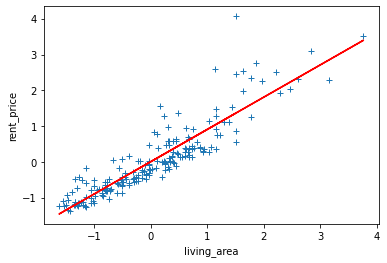

In [228]:
N = x.size

# YOUR CODE (START)
# compose torch tensors X,Y of shape (N,2) and (N,1) respectively
X = torch.ones((N, 2))
X[:, 1] = torch.from_numpy(x)
Y = torch.empty((N, 1))
Y[:, 0] = torch.from_numpy(y).to(torch.double)


# solution of normal equations, 'a' a torch tensor of shape (2,1) that contains parameters alpha and beta, which shall be optimized
a = torch.inverse(torch.transpose(X, 0, 1)@X)@torch.transpose(X, 0, 1)@Y
# a_star = torch.linalg.lstsq(Y, X).solution

# # prediction
Yhat = a[0] + X[:, 1]*a[1]
# Yhat_2 = a_star[0,0] + X[:, 1]*a_star[0,1]

# # YOUR CODE (END)

# plot
plt.plot(X[:, 1], Y, "+")
plt.plot(X[:, 1], Yhat, 'r')
# plt.plot(X[:, 1], Yhat_2, 'r')
plt.xlabel("living_area")
plt.ylabel("rent_price")
# print(a)




$\qquad C = \frac{1}{2N}\sum_j \left(y_j-\hat{y}_j\right)^2 = C(\alpha,\beta)$

#### Cost

In [229]:
def cost(X: torch.Tensor, Y: torch.Tensor, a: torch.Tensor):
    # YOUR CODE (START)
    N = X.size(dim=0)
    Y_hat = a[0] + X[:, 1]*a[1]
    return 1/(2*N) * torch.sum(torch.pow(Y - Y_hat, 2))
    # YOUR CODE (END)


In [230]:
cost_closed_form = cost(X,Y,a)
print(cost_closed_form)

tensor(182.6755)


### Gradient Descent

Specify the gradient of the cost (w.r.t. $\alpha, \beta$) here as maths expression.

In [231]:
def gradient_cost(X, Y, params):
    # YOUR CODE (START)
    N = X.size(dim=0)
    a = params[0]
    b = params[1]

    partial_derivative_wrt_a = 1/(2*N) * torch.sum(2 * (Y - (a + X[:, 1]*b)))
    partial_derivative_wrt_b = 1/(2*N) * torch.sum(2*X[:, 1] * (Y - (a + X[:, 1]*b)))

    return torch.tensor([[partial_derivative_wrt_a], [partial_derivative_wrt_b]])
    # YOUR CODE (END)


tensor(100.5000, dtype=torch.float64)
tensor(100.5000, dtype=torch.float64)
tensor(100.5000, dtype=torch.float64)
tensor(100.5000, dtype=torch.float64)
tensor(100.5000, dtype=torch.float64)
tensor(100.5000, dtype=torch.float64)
tensor(100.5003, dtype=torch.float64)
tensor(100.5223, dtype=torch.float64)
tensor(102.3292, dtype=torch.float64)
tensor(250.3159, dtype=torch.float64)
tensor(12370.7972, dtype=torch.float64)
tensor(1005068.5200, dtype=torch.float64)
tensor(82309493.7547, dtype=torch.float64)
tensor(6.7413e+09, dtype=torch.float64)
tensor(5.5213e+11, dtype=torch.float64)
tensor(4.5221e+13, dtype=torch.float64)
tensor(3.7037e+15, dtype=torch.float64)
tensor(3.0334e+17, dtype=torch.float64)
tensor(2.4845e+19, dtype=torch.float64)
tensor(2.0348e+21, dtype=torch.float64)
tensor(1.6666e+23, dtype=torch.float64)
tensor(1.3650e+25, dtype=torch.float64)
tensor(1.1179e+27, dtype=torch.float64)
tensor(9.1563e+28, dtype=torch.float64)
tensor(7.4992e+30, dtype=torch.float64)
tensor(6.1420e+

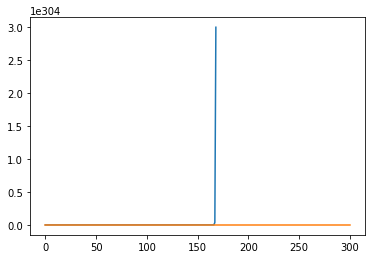

In [244]:
# adjust if needed
nepochs = 300
lr = 0.05

# initial parameter
a = torch.tensor([0.0, 0.0], dtype=torch.float64).reshape(2, 1)

# track the costs
costs = [cost(X, Y, a)]

# YOUR CODE (START)

# loop over the epochs: update parameter values, compute the cost and add it to the costs list
for epoch in range(nepochs):
    a = a - lr * gradient_cost(X, Y, a)
    print(cost(X, Y, a))
    costs.append(cost(X, Y, a))


# YOUR CODE (END)

# some output
cost_gd = costs[-1]
print(cost_gd)
plt.plot(range(nepochs+1), costs)
plt.plot(range(nepochs+1), cost_closed_form*torch.ones(nepochs+1))


### Different Learning Rates

Play with different learning rates: Explore for what learning rates 
- the learning is most efficient
- the learning yet works
- the learning does not work anymore (learning rate too large)

Explain the different scenarios.